In [1]:
import sys
import torch
sys.path.append("/home/jovyan/P1-Temp-Reg/nns_based_approach")
from utilities.dataset import ImageDataset


In [2]:
# Directory of the hdf5 data files
data_path = "/home/jovyan/data/"

set = ImageDataset(input_data_path=f"{data_path}input_data/", 
                   label_data_path=f"{data_path}label_data/")
print(f"Length of dataset: {len(set)}")

data, label, model = set[100]

Length of dataset: 488
Started reading acquisitions from /home/jovyan/data/input_data/y_100.h5
0%..10%..20%..30%..40%..50%..60%..70%..80%..90%..99%..
Finished reading acquisitions from /home/jovyan/data/input_data/y_100.h5


In [3]:
print(type(data))
print(type(label))

<class 'sirf.Gadgetron.AcquisitionData'>
<class 'nibabel.nifti1.Nifti1Image'>


In [4]:
valid_fraction = 0.2
train_set_len = int((1-0.2)*len(set))
train_set, valid_set = torch.utils.data.random_split(set, [train_set_len, len(set)-train_set_len])

print(f"Training set: {len(train_set)}\nValidation set: {len(valid_set)}")

Training set: 390
Validation set: 98


In [6]:
im_orig = model.backward(data)
print(im_orig)

<function matplotlib.pyplot.show(close=None, block=None)>

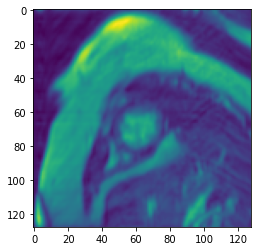

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.abs(im_orig.as_array())[0, ...])
plt.show